# Evaluation of Traffic Accident Hotspot Detection Methods

Luke Zaruba, Bryan Runck

January 22, 2024

<br>

*Abstract here...*

In [1]:
# Imports
import contextily as ctx
import geopandas as gpd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Data

In [2]:
# Loading data
grid_5000 = gpd.read_file("../data/results/grid_5000_results.geojson")
grid_10000 = gpd.read_file("../data/results/grid_10000_results.geojson")
grid_25000 = gpd.read_file("../data/results/grid_25000_results.geojson")

COLUMNS = ['LISA_DENSITY', 'LISA_INTENSITY', 'LISA_RATE_FUZZY', 'LISA_DENSITY_FUZZY', 'LISA_INTENSITY_FUZZY', 'LISA_RATE_KNN',
    'LISA_DENSITY_KNN', 'LISA_INTENSITY_KNN', 'ADBSCAN_MEAN_ALL', 'ADBSCAN_MEAN_HH', 'ADBSCAN_MEAN_HHHL', 'ADBSCAN_MED_ALL',
    'ADBSCAN_MED_HH', 'ADBSCAN_MED_HHHL'
]

## Jaccard Index

The Jaccard Index (Coefficient) is a method for quantifying the similarity between two sets. In this case, the grid cells corresponding to any two hotspot detection methods make up the two sets used in the index.

The index for two sets, $A$ and $B$, is calculated as:

$$J(A, B) = \frac{|A \cap B|}{|A \cup B|}

In [3]:
def pairwise_jaccard(df, columns):
    # Storing data
    history = []
    values = []
    
    # Loop through columns
    for col1 in columns:
        for col2 in columns:
            # Skip cols that are identical or already computed
            if col1 == col2 or (col1, col2) in history or (col2, col1) in history:
                continue
            else:
                # Calculate index
                numerator = len(df.loc[(df[col1] == 1) & (df[col2] == 1)])
                denominator = (len(df) * 2) - numerator
                jaccard = round(numerator / denominator, 4)
                
                history.append((col1, col2))
                values.append((col1, col2, jaccard))
                
                print(f"{col1} & {col2} = {jaccard}")
                
    return values

In [4]:
# Jaccard Index for 5000m Grid
jaccard_5000 = pairwise_jaccard(grid_5000, COLUMNS)

LISA_DENSITY & LISA_INTENSITY = 0.0121
LISA_DENSITY & LISA_RATE_FUZZY = 0.0117
LISA_DENSITY & LISA_DENSITY_FUZZY = 0.0149
LISA_DENSITY & LISA_INTENSITY_FUZZY = 0.0125
LISA_DENSITY & LISA_RATE_KNN = 0.0098
LISA_DENSITY & LISA_DENSITY_KNN = 0.0114
LISA_DENSITY & LISA_INTENSITY_KNN = 0.0087
LISA_DENSITY & ADBSCAN_MEAN_ALL = 0.0193
LISA_DENSITY & ADBSCAN_MEAN_HH = 0.0051
LISA_DENSITY & ADBSCAN_MEAN_HHHL = 0.0016
LISA_DENSITY & ADBSCAN_MED_ALL = 0.0203
LISA_DENSITY & ADBSCAN_MED_HH = 0.005
LISA_DENSITY & ADBSCAN_MED_HHHL = 0.0034
LISA_INTENSITY & LISA_RATE_FUZZY = 0.0038
LISA_INTENSITY & LISA_DENSITY_FUZZY = 0.0078
LISA_INTENSITY & LISA_INTENSITY_FUZZY = 0.0038
LISA_INTENSITY & LISA_RATE_KNN = 0.0043
LISA_INTENSITY & LISA_DENSITY_KNN = 0.0063
LISA_INTENSITY & LISA_INTENSITY_KNN = 0.0029
LISA_INTENSITY & ADBSCAN_MEAN_ALL = 0.0091
LISA_INTENSITY & ADBSCAN_MEAN_HH = 0.0022
LISA_INTENSITY & ADBSCAN_MEAN_HHHL = 0.0005
LISA_INTENSITY & ADBSCAN_MED_ALL = 0.0093
LISA_INTENSITY & ADBSCAN_MED_HH = 0.

In [5]:
# Jaccard Index for 10000m Grid
jaccard_10000 = pairwise_jaccard(grid_10000, COLUMNS)

LISA_DENSITY & LISA_INTENSITY = 0.0205
LISA_DENSITY & LISA_RATE_FUZZY = 0.0285
LISA_DENSITY & LISA_DENSITY_FUZZY = 0.0344
LISA_DENSITY & LISA_INTENSITY_FUZZY = 0.0319
LISA_DENSITY & LISA_RATE_KNN = 0.0258
LISA_DENSITY & LISA_DENSITY_KNN = 0.0294
LISA_DENSITY & LISA_INTENSITY_KNN = 0.0228
LISA_DENSITY & ADBSCAN_MEAN_ALL = 0.0299
LISA_DENSITY & ADBSCAN_MEAN_HH = 0.0075
LISA_DENSITY & ADBSCAN_MEAN_HHHL = 0.0022
LISA_DENSITY & ADBSCAN_MED_ALL = 0.0303
LISA_DENSITY & ADBSCAN_MED_HH = 0.0075
LISA_DENSITY & ADBSCAN_MED_HHHL = 0.0051
LISA_INTENSITY & LISA_RATE_FUZZY = 0.0135
LISA_INTENSITY & LISA_DENSITY_FUZZY = 0.0207
LISA_INTENSITY & LISA_INTENSITY_FUZZY = 0.0143
LISA_INTENSITY & LISA_RATE_KNN = 0.0149
LISA_INTENSITY & LISA_DENSITY_KNN = 0.0172
LISA_INTENSITY & LISA_INTENSITY_KNN = 0.0116
LISA_INTENSITY & ADBSCAN_MEAN_ALL = 0.0173
LISA_INTENSITY & ADBSCAN_MEAN_HH = 0.0054
LISA_INTENSITY & ADBSCAN_MEAN_HHHL = 0.0018
LISA_INTENSITY & ADBSCAN_MED_ALL = 0.0168
LISA_INTENSITY & ADBSCAN_MED_HH = 0

In [6]:
# Jaccard Index for 25000m Grid
jaccard_25000 = pairwise_jaccard(grid_25000, COLUMNS)

LISA_DENSITY & LISA_INTENSITY = 0.0569
LISA_DENSITY & LISA_RATE_FUZZY = 0.112
LISA_DENSITY & LISA_DENSITY_FUZZY = 0.1057
LISA_DENSITY & LISA_INTENSITY_FUZZY = 0.1154
LISA_DENSITY & LISA_RATE_KNN = 0.1092
LISA_DENSITY & LISA_DENSITY_KNN = 0.0994
LISA_DENSITY & LISA_INTENSITY_KNN = 0.0985
LISA_DENSITY & ADBSCAN_MEAN_ALL = 0.0641
LISA_DENSITY & ADBSCAN_MEAN_HH = 0.0227
LISA_DENSITY & ADBSCAN_MEAN_HHHL = 0.0082
LISA_DENSITY & ADBSCAN_MED_ALL = 0.0627
LISA_DENSITY & ADBSCAN_MED_HH = 0.0227
LISA_DENSITY & ADBSCAN_MED_HHHL = 0.0142
LISA_INTENSITY & LISA_RATE_FUZZY = 0.0735
LISA_INTENSITY & LISA_DENSITY_FUZZY = 0.0677
LISA_INTENSITY & LISA_INTENSITY_FUZZY = 0.0752
LISA_INTENSITY & LISA_RATE_KNN = 0.0767
LISA_INTENSITY & LISA_DENSITY_KNN = 0.062
LISA_INTENSITY & LISA_INTENSITY_KNN = 0.0629
LISA_INTENSITY & ADBSCAN_MEAN_ALL = 0.046
LISA_INTENSITY & ADBSCAN_MEAN_HH = 0.0149
LISA_INTENSITY & ADBSCAN_MEAN_HHHL = 0.0045
LISA_INTENSITY & ADBSCAN_MED_ALL = 0.0429
LISA_INTENSITY & ADBSCAN_MED_HH = 0.01

## Inter-Rater Reliability

Cohen's Kappa is a metric used to measure pairwise inter-rater reliability (IRR). IRR can be used to measure the extent of agreement of scores produced by different raters. In this case, the raters are any two of the various hotspot detection methods, which are then used to construct a confusion matrix and calculate the agreement between how the two methods evaluated the grid cells as being a part of a hotspot or not.

Cohen's Kappa is calculated as:

$$
\kappa = \frac{p_{o} - p_{e}}{1 - p_{e}}, \quad
p_{o} = \frac{TP + TN}{N}, \quad
p_{e} = p_{1} + p_{2}
$$

Where

$$
p_{1} = \frac{(TP + FN) \times (TP + FP)}{N^2}, \quad
p_{2} = \frac{(TN + FN) \times (TN + FP)}{N^2}
$$


In [7]:
def cohen_kappa(df, columns):
    # Storing data
    history = []
    values = []
    
    # Loop through columns
    for col1 in columns:
        for col2 in columns:
            # Skip cols that are identical or already computed
            if col1 == col2 or (col1, col2) in history or (col2, col1) in history:
                continue
            else:
                # Calculate Kappa
                tp = len(df.loc[(df[col1] == 1) & (df[col2] == 1)])
                fp = len(df.loc[(df[col1] == 0) & (df[col2] == 1)])
                tn = len(df.loc[(df[col1] == 0) & (df[col2] == 0)])
                fn = len(df.loc[(df[col1] == 1) & (df[col2] == 0)])
                N = len(df)
                
                p1 = ((tp + fn) * (tp + fp)) / (N**2)
                p2 = ((tn + fn) * (tn + fp)) / (N**2)
                
                pe = p1 + p2
                po = (tp + tn) / N
                
                kappa = (po - pe) / (1 - pe)
                
                history.append((col1, col2))
                values.append((col1, col2, kappa))
                
                print(f"{col1} & {col2} = {kappa}")
                
    return values

In [8]:
# Cohen's Kappa for 5000m Grid
cohen_5000 = cohen_kappa(grid_5000, COLUMNS)

LISA_DENSITY & LISA_INTENSITY = 0.27912641261276155
LISA_DENSITY & LISA_RATE_FUZZY = 0.11985623397501158
LISA_DENSITY & LISA_DENSITY_FUZZY = 0.30678961426020157
LISA_DENSITY & LISA_INTENSITY_FUZZY = 0.0949647149712037
LISA_DENSITY & LISA_RATE_KNN = 0.10492731181533461
LISA_DENSITY & LISA_DENSITY_KNN = 0.27018635571197447
LISA_DENSITY & LISA_INTENSITY_KNN = 0.09640526084504786
LISA_DENSITY & ADBSCAN_MEAN_ALL = 0.45410738598643813
LISA_DENSITY & ADBSCAN_MEAN_HH = 0.19373983572656106
LISA_DENSITY & ADBSCAN_MEAN_HHHL = 0.0664570237903294
LISA_DENSITY & ADBSCAN_MED_ALL = 0.4792882484488245
LISA_DENSITY & ADBSCAN_MED_HH = 0.19004138167185214
LISA_DENSITY & ADBSCAN_MED_HHHL = 0.13354780583820253
LISA_INTENSITY & LISA_RATE_FUZZY = -0.006497245360740966
LISA_INTENSITY & LISA_DENSITY_FUZZY = 0.17031664042737574
LISA_INTENSITY & LISA_INTENSITY_FUZZY = -0.022627282096523416
LISA_INTENSITY & LISA_RATE_KNN = 0.0180501822884731
LISA_INTENSITY & LISA_DENSITY_KNN = 0.16613561012821687
LISA_INTENSITY & 

In [9]:
# Cohen's Kappa for 10000m Grid
cohen_10000 = cohen_kappa(grid_10000, COLUMNS)

LISA_DENSITY & LISA_INTENSITY = 0.33776207373822814
LISA_DENSITY & LISA_RATE_FUZZY = 0.13111023604531438


LISA_DENSITY & LISA_DENSITY_FUZZY = 0.3807322921431659
LISA_DENSITY & LISA_INTENSITY_FUZZY = 0.11199926149150928
LISA_DENSITY & LISA_RATE_KNN = 0.1331142393636506
LISA_DENSITY & LISA_DENSITY_KNN = 0.37754969743427214
LISA_DENSITY & LISA_INTENSITY_KNN = 0.12457315042865777
LISA_DENSITY & ADBSCAN_MEAN_ALL = 0.48002982304209657
LISA_DENSITY & ADBSCAN_MEAN_HH = 0.20257310108725649
LISA_DENSITY & ADBSCAN_MEAN_HHHL = 0.062160525385989436
LISA_DENSITY & ADBSCAN_MED_ALL = 0.5052192271549085
LISA_DENSITY & ADBSCAN_MED_HH = 0.2038978283620029
LISA_DENSITY & ADBSCAN_MED_HHHL = 0.14116915161402468
LISA_INTENSITY & LISA_RATE_FUZZY = 0.007156589684345498
LISA_INTENSITY & LISA_DENSITY_FUZZY = 0.22233559329660996
LISA_INTENSITY & LISA_INTENSITY_FUZZY = -0.01388883847055789
LISA_INTENSITY & LISA_RATE_KNN = 0.045376594536740394
LISA_INTENSITY & LISA_DENSITY_KNN = 0.21589388649703078
LISA_INTENSITY & LISA_INTENSITY_KNN = 0.018569597197644613
LISA_INTENSITY & ADBSCAN_MEAN_ALL = 0.28973695629370017
LISA_IN

In [10]:
# Cohen's Kappa for 25000m Grid
cohen_25000 = cohen_kappa(grid_25000, COLUMNS)

LISA_DENSITY & LISA_INTENSITY = 0.37979598280696
LISA_DENSITY & LISA_RATE_FUZZY = 0.14934750578105296
LISA_DENSITY & LISA_DENSITY_FUZZY = 0.3556370479859398
LISA_DENSITY & LISA_INTENSITY_FUZZY = 0.11678640139656433
LISA_DENSITY & LISA_RATE_KNN = 0.1829632408693987
LISA_DENSITY & LISA_DENSITY_KNN = 0.3958923344201431
LISA_DENSITY & LISA_INTENSITY_KNN = 0.15008969218257096
LISA_DENSITY & ADBSCAN_MEAN_ALL = 0.4528082187991657
LISA_DENSITY & ADBSCAN_MEAN_HH = 0.262437314735938
LISA_DENSITY & ADBSCAN_MEAN_HHHL = 0.10206174204675532
LISA_DENSITY & ADBSCAN_MED_ALL = 0.4712971006108251
LISA_DENSITY & ADBSCAN_MED_HH = 0.262437314735938
LISA_DENSITY & ADBSCAN_MED_HHHL = 0.17082103840086346
LISA_INTENSITY & LISA_RATE_FUZZY = 0.037690984235782016
LISA_INTENSITY & LISA_DENSITY_FUZZY = 0.17686101033668059
LISA_INTENSITY & LISA_INTENSITY_FUZZY = 0.011349196727005817
LISA_INTENSITY & LISA_RATE_KNN = 0.09219883195083285
LISA_INTENSITY & LISA_DENSITY_KNN = 0.19644031068150272
LISA_INTENSITY & LISA_INTEN

## Accuracy

Accuracy is a common metric used to assess how close values are to their true value. In the case of comparing any two different hotspot detection methods, there is no real "true" value. Therefore, this "pseudo-accuracy" value is simply a measure of how similar the hotspot classifications are from one method compared to another. Using a confusion matrix to represent the two methods, the True Positive (TP), True Negative (TN), False Positive (FP) and Flase Negative (FN) values can be calculated to show where two methods share similarity and differences.

Mathematically, it can be defined as:

$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

In [11]:
def pairwise_pseudo_accuracy(df, columns):
    # Storing data
    history = []
    values = []
    
    # Loop through columns
    for col1 in columns:
        for col2 in columns:
            # Order matters here, so only look in history for same ordering of columns
            if col1 == col2 or (col1, col2) in history:
                continue
            else:
                # Calculate "Accuracy"
                tp = len(df.loc[(df[col1] == 1) & (df[col2] == 1)])
                tn = len(df.loc[(df[col1] == 0) & (df[col2] == 0)])
                N = len(df)
                
                accuracy = (tp + tn) / N
                
                history.append((col1, col2))
                values.append((col1, col2, accuracy))
                
                print(f"{col1} & {col2} = {accuracy}")
                
    return values

In [12]:
# Pseudo-Accuracy for 5000m Grid
accuracy_5000 = pairwise_pseudo_accuracy(grid_5000, COLUMNS)

LISA_DENSITY & LISA_INTENSITY = 0.9031674208144796
LISA_DENSITY & LISA_RATE_FUZZY = 0.8268635389378424
LISA_DENSITY & LISA_DENSITY_FUZZY = 0.8967849487973327
LISA_DENSITY & LISA_INTENSITY_FUZZY = 0.7981424148606812
LISA_DENSITY & LISA_RATE_KNN = 0.837532745891879
LISA_DENSITY & LISA_DENSITY_KNN = 0.9037866158609192
LISA_DENSITY & LISA_INTENSITY_KNN = 0.8442486306263396
LISA_DENSITY & ADBSCAN_MEAN_ALL = 0.9226958799714218
LISA_DENSITY & ADBSCAN_MEAN_HH = 0.9241247916170516
LISA_DENSITY & ADBSCAN_MEAN_HHHL = 0.91783758037628
LISA_DENSITY & ADBSCAN_MED_ALL = 0.9262205286973089
LISA_DENSITY & ADBSCAN_MED_HH = 0.923648487735175
LISA_DENSITY & ADBSCAN_MED_HHHL = 0.9205525125029769
LISA_INTENSITY & LISA_DENSITY = 0.9031674208144796
LISA_INTENSITY & LISA_RATE_FUZZY = 0.8199571326506311
LISA_INTENSITY & LISA_DENSITY_FUZZY = 0.8935937127887592
LISA_INTENSITY & LISA_INTENSITY_FUZZY = 0.7885687068349607
LISA_INTENSITY & LISA_RATE_KNN = 0.8401524172422006
LISA_INTENSITY & LISA_DENSITY_KNN = 0.90812

In [13]:
# Pseudo-Accuracy for 10000m Grid
accuracy_10000 = pairwise_pseudo_accuracy(grid_10000, COLUMNS)

LISA_DENSITY & LISA_INTENSITY = 0.8808015782369432
LISA_DENSITY & LISA_RATE_FUZZY = 0.7048073927941024
LISA_DENSITY & LISA_DENSITY_FUZZY = 0.8472640431938532
LISA_DENSITY & LISA_INTENSITY_FUZZY = 0.6556951510746548
LISA_DENSITY & LISA_RATE_KNN = 0.7276502959194269
LISA_DENSITY & LISA_DENSITY_KNN = 0.8629425812480531
LISA_DENSITY & LISA_INTENSITY_KNN = 0.7429135084622573
LISA_DENSITY & ADBSCAN_MEAN_ALL = 0.8995950576264147
LISA_DENSITY & ADBSCAN_MEAN_HH = 0.8989720693593604
LISA_DENSITY & ADBSCAN_MEAN_HHHL = 0.8896272453535459
LISA_DENSITY & ADBSCAN_MED_ALL = 0.906447928564012
LISA_DENSITY & ADBSCAN_MED_HH = 0.8990759007372028
LISA_DENSITY & ADBSCAN_MED_HHHL = 0.8942996573564531
LISA_INTENSITY & LISA_DENSITY = 0.8808015782369432
LISA_INTENSITY & LISA_RATE_FUZZY = 0.6734503166857024
LISA_INTENSITY & LISA_DENSITY_FUZZY = 0.821513861488942
LISA_INTENSITY & LISA_INTENSITY_FUZZY = 0.6145779254490707
LISA_INTENSITY & LISA_RATE_KNN = 0.7120755892430692
LISA_INTENSITY & LISA_DENSITY_KNN = 0.842

In [14]:
# Pseudo-Accuracy for 25000m Grid
accuracy_25000 = pairwise_pseudo_accuracy(grid_25000, COLUMNS)

LISA_DENSITY & LISA_INTENSITY = 0.7924869425472078
LISA_DENSITY & LISA_RATE_FUZZY = 0.49839292888710324
LISA_DENSITY & LISA_DENSITY_FUZZY = 0.6936520691040579
LISA_DENSITY & LISA_INTENSITY_FUZZY = 0.4527922860586581
LISA_DENSITY & LISA_RATE_KNN = 0.5403776617115308
LISA_DENSITY & LISA_DENSITY_KNN = 0.7316191241462434
LISA_DENSITY & LISA_INTENSITY_KNN = 0.5353555644837285
LISA_DENSITY & ADBSCAN_MEAN_ALL = 0.8163921253515468
LISA_DENSITY & ADBSCAN_MEAN_HH = 0.8091603053435115
LISA_DENSITY & ADBSCAN_MEAN_HHHL = 0.7810365608678184
LISA_DENSITY & ADBSCAN_MED_ALL = 0.8270389714744878
LISA_DENSITY & ADBSCAN_MED_HH = 0.8091603053435115
LISA_DENSITY & ADBSCAN_MED_HHHL = 0.7926878264363199
LISA_INTENSITY & LISA_DENSITY = 0.7924869425472078
LISA_INTENSITY & LISA_RATE_FUZZY = 0.4170349537967055
LISA_INTENSITY & LISA_DENSITY_FUZZY = 0.6122940940136601
LISA_INTENSITY & LISA_INTENSITY_FUZZY = 0.3662113298513459
LISA_INTENSITY & LISA_RATE_KNN = 0.4791080755323423
LISA_INTENSITY & LISA_DENSITY_KNN = 0.

## R-Squared

R<sup>2</sup> values are metrics that show the goodness of fit of the data. In other words, if the points are plotted along two dimensions, with each dimension representing a method, the line of best fit can be determined and therefore the R<sup>2</sup> value can also be produced. The values can share insight into the relationship between the two given methods being compared.

In [15]:
# Correlation Matrix (R2 values) for 5000m Grid
corr_5000 = grid_5000[COLUMNS].corr()

corr_5000.style.background_gradient(cmap="coolwarm")

,LISA_DENSITY,LISA_INTENSITY,LISA_RATE_FUZZY,LISA_DENSITY_FUZZY,LISA_INTENSITY_FUZZY,LISA_RATE_KNN,LISA_DENSITY_KNN,LISA_INTENSITY_KNN,ADBSCAN_MEAN_ALL,ADBSCAN_MEAN_HH,ADBSCAN_MEAN_HHHL,ADBSCAN_MED_ALL,ADBSCAN_MED_HH,ADBSCAN_MED_HHHL
LISA_DENSITY,1.000000,0.283862,0.124035,0.307120,0.102176,0.106634,0.276234,0.097153,0.456914,0.305898,0.160984,0.482210,0.298159,0.236885
LISA_INTENSITY,0.283862,1.000000,-0.007158,0.171930,-0.026421,0.019260,0.166197,-0.008014,0.231649,0.142871,0.050950,0.236157,0.141282,0.146740
LISA_RATE_FUZZY,0.124035,-0.007158,1.000000,0.176153,0.726761,0.539215,0.179278,0.489762,0.074853,0.055960,0.052987,0.086763,0.053526,0.045394
LISA_DENSITY_FUZZY,0.307120,0.171930,0.176153,1.000000,0.111093,0.194003,0.659910,0.120890,0.334983,0.237750,0.100916,0.316375,0.227095,0.183563
LISA_INTENSITY_FUZZY,0.102176,-0.026421,0.726761,0.111093,1.000000,0.446839,0.129172,0.494655,0.052110,0.023024,0.025410,0.056954,0.025599,0.018536
LISA_RATE_KNN,0.106634,0.019260,0.539215,0.194003,0.446839,1.000000,0.209918,0.776611,0.074630,0.061581,0.037429,0.084987,0.046720,0.028124
LISA_DENSITY_KNN,0.276234,0.166197,0.179278,0.659910,0.129172,0.209918,1.000000,0.139838,0.265968,0.184169,0.071904,0.248671,0.176558,0.129427
LISA_INTENSITY_KNN,0.097153,-0.008014,0.489762,0.120890,0.494655,0.776611,0.139838,1.000000,0.046043,0.037840,0.024840,0.081964,0.031197,0.016062
ADBSCAN_MEAN_ALL,0.456914,0.231649,0.074853,0.334983,0.052110,0.074630,0.265968,0.046043,1.000000,0.399003,0.241433,0.847646,0.402299,0.345040
ADBSCAN_MEAN_HH,0.305898,0.142871,0.055960,0.237750,0.023024,0.061581,0.184169,0.037840,0.399003,1.000000,0.605091,0.398707,0.897200,0.745230


In [16]:
# Correlation Matrix (R2 values) for 10000m Grid
corr_10000 = grid_10000[COLUMNS].corr()

corr_10000.style.background_gradient(cmap="coolwarm")

,LISA_DENSITY,LISA_INTENSITY,LISA_RATE_FUZZY,LISA_DENSITY_FUZZY,LISA_INTENSITY_FUZZY,LISA_RATE_KNN,LISA_DENSITY_KNN,LISA_INTENSITY_KNN,ADBSCAN_MEAN_ALL,ADBSCAN_MEAN_HH,ADBSCAN_MEAN_HHHL,ADBSCAN_MED_ALL,ADBSCAN_MED_HH,ADBSCAN_MED_HHHL
LISA_DENSITY,1.000000,0.341388,0.154641,0.392488,0.143399,0.150656,0.380158,0.136637,0.480580,0.306205,0.146913,0.506698,0.307527,0.240669
LISA_INTENSITY,0.341388,1.000000,0.009189,0.239841,-0.019605,0.055441,0.223455,0.021816,0.291144,0.245422,0.139739,0.293322,0.225037,0.232862
LISA_RATE_FUZZY,0.154641,0.009189,1.000000,0.221114,0.719022,0.550413,0.236899,0.512811,0.105223,0.088885,0.091095,0.094365,0.091565,0.089568
LISA_DENSITY_FUZZY,0.392488,0.239841,0.221114,1.000000,0.147669,0.218131,0.709259,0.148940,0.413244,0.270176,0.131361,0.373583,0.256644,0.207196
LISA_INTENSITY_FUZZY,0.143399,-0.019605,0.719022,0.147669,1.000000,0.454168,0.170224,0.502430,0.068855,0.049054,0.054327,0.055693,0.051602,0.034078
LISA_RATE_KNN,0.150656,0.055441,0.550413,0.218131,0.454168,1.000000,0.245872,0.751035,0.092060,0.073784,0.040315,0.084648,0.076676,0.053914
LISA_DENSITY_KNN,0.380158,0.223455,0.236899,0.709259,0.170224,0.245872,1.000000,0.171353,0.353619,0.268086,0.151547,0.318335,0.287372,0.230214
LISA_INTENSITY_KNN,0.136637,0.021816,0.512811,0.148940,0.502430,0.751035,0.171353,1.000000,0.073240,0.051582,0.034276,0.090316,0.063939,0.048071
ADBSCAN_MEAN_ALL,0.480580,0.291144,0.105223,0.413244,0.068855,0.092060,0.353619,0.073240,1.000000,0.396604,0.232869,0.872322,0.397776,0.339989
ADBSCAN_MEAN_HH,0.306205,0.245422,0.088885,0.270176,0.049054,0.073784,0.268086,0.051582,0.396604,1.000000,0.587159,0.408105,0.890802,0.726667


In [17]:
# Correlation Matrix (R2 values) for 25000m Grid
corr_25000 = grid_25000[COLUMNS].corr()

corr_25000.style.background_gradient(cmap="coolwarm")

,LISA_DENSITY,LISA_INTENSITY,LISA_RATE_FUZZY,LISA_DENSITY_FUZZY,LISA_INTENSITY_FUZZY,LISA_RATE_KNN,LISA_DENSITY_KNN,LISA_INTENSITY_KNN,ADBSCAN_MEAN_ALL,ADBSCAN_MEAN_HH,ADBSCAN_MEAN_HHHL,ADBSCAN_MED_ALL,ADBSCAN_MED_HH,ADBSCAN_MED_HHHL
LISA_DENSITY,1.000000,0.383700,0.220674,0.400364,0.191200,0.249734,0.424173,0.196538,0.457086,0.388636,0.231894,0.479902,0.388636,0.305592
LISA_INTENSITY,0.383700,1.000000,0.062158,0.214297,0.020887,0.139453,0.223500,0.041435,0.342810,0.261140,0.121204,0.336782,0.261140,0.240232
LISA_RATE_FUZZY,0.220674,0.062158,1.000000,0.221820,0.722331,0.585712,0.272330,0.529379,0.018315,0.110030,0.090394,0.026705,0.110030,0.067286
LISA_DENSITY_FUZZY,0.400364,0.214297,0.221820,1.000000,0.160240,0.308363,0.764171,0.216341,0.432761,0.205221,0.090127,0.365537,0.205221,0.146830
LISA_INTENSITY_FUZZY,0.191200,0.020887,0.722331,0.160240,1.000000,0.476143,0.211716,0.520487,-0.009680,0.045035,0.079051,0.008221,0.045035,-0.005153
LISA_RATE_KNN,0.249734,0.139453,0.585712,0.308363,0.476143,1.000000,0.358150,0.775546,0.115133,0.169417,0.101089,0.122212,0.169417,0.133216
LISA_DENSITY_KNN,0.424173,0.223500,0.272330,0.764171,0.211716,0.358150,1.000000,0.237330,0.396201,0.266900,0.159256,0.339591,0.266900,0.209869
LISA_INTENSITY_KNN,0.196538,0.041435,0.529379,0.216341,0.520487,0.775546,0.237330,1.000000,0.028477,0.101085,0.107614,0.082774,0.101085,0.042716
ADBSCAN_MEAN_ALL,0.457086,0.342810,0.018315,0.432761,-0.009680,0.115133,0.396201,0.028477,1.000000,0.445857,0.266038,0.873514,0.445857,0.350587
ADBSCAN_MEAN_HH,0.388636,0.261140,0.110030,0.205221,0.045035,0.169417,0.266900,0.101085,0.445857,1.000000,0.596689,0.470332,1.000000,0.786321


## Mapping Agreement

By adding up all of the methods columns, we are able to determine the number of methods that each cell is classified as a hotspot by. With 14 different methods, each grid cell will then have a value from 0 to 14, where 0 indicates that no methods classified that cell as a hotspot ad 14 indicates that all methods classified it as a hotspot.

We can then visualize this by displaying it on a map.

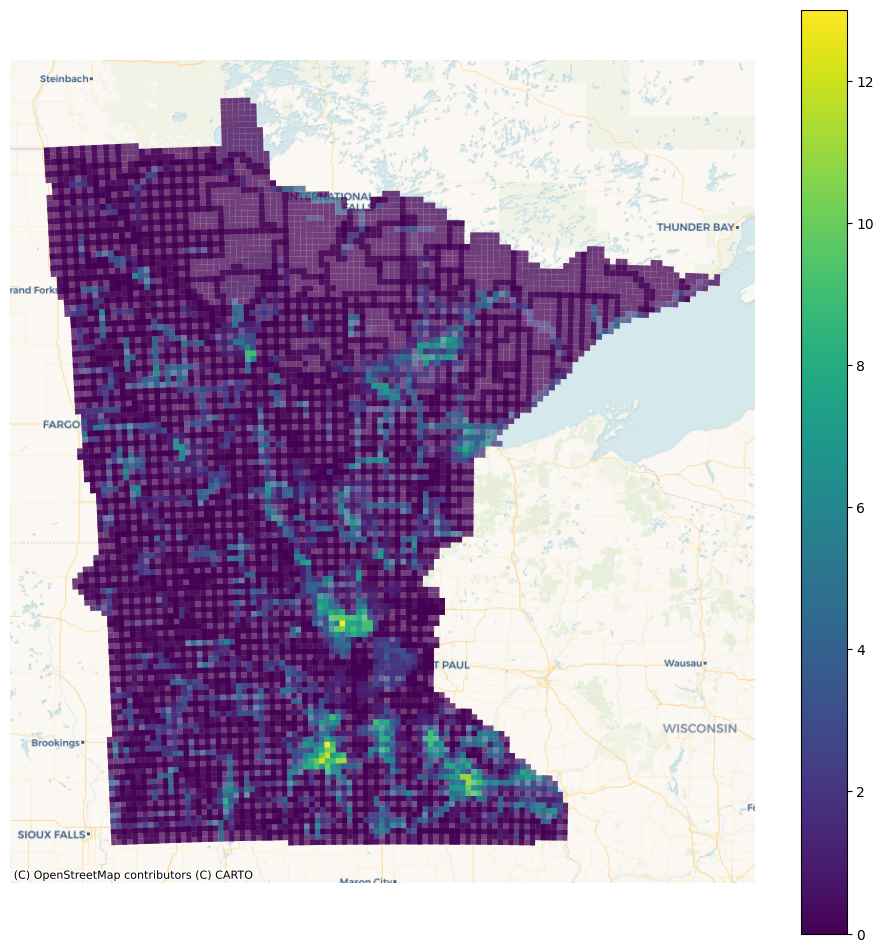

In [18]:
# Calculating agreement for 5000 grid
grid_5000["Agreement"] = grid_5000["LISA_DENSITY"] + grid_5000["LISA_INTENSITY"] + grid_5000["LISA_RATE_FUZZY"] +\
    grid_5000["LISA_DENSITY_FUZZY"] + grid_5000["LISA_INTENSITY_FUZZY"] + grid_5000["LISA_RATE_KNN"] + grid_5000["LISA_DENSITY_KNN"] +\
    grid_5000["LISA_INTENSITY_KNN"] + grid_5000["ADBSCAN_MEAN_ALL"] + grid_5000["ADBSCAN_MEAN_HH"] + grid_5000["ADBSCAN_MEAN_HHHL"] +\
    grid_5000["ADBSCAN_MED_ALL"] + grid_5000["ADBSCAN_MED_HH"] + grid_5000["ADBSCAN_MED_HHHL"]

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

grid_5000.to_crs(epsg=3857).plot(
    ax=ax,
    alpha=0.75,
    column="Agreement",
    legend=True
)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager)

ax.axis("off")
plt.show()

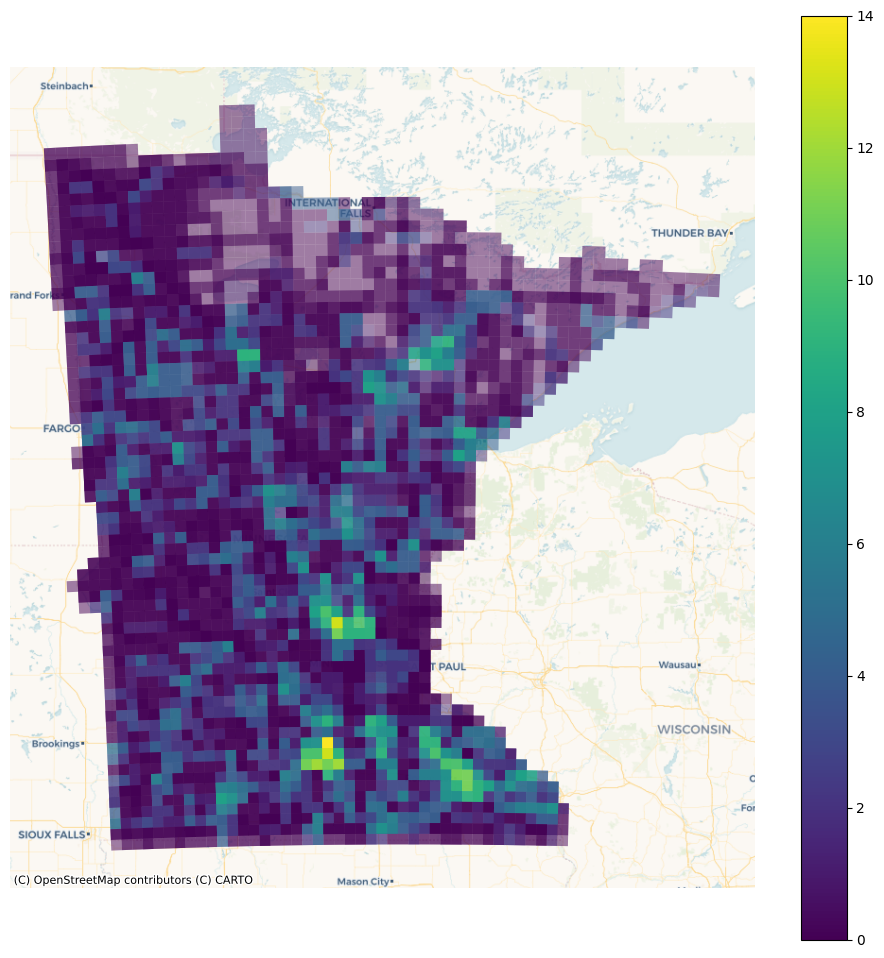

In [19]:
# Calculating agreement for 10000 grid
grid_10000["Agreement"] = grid_10000["LISA_DENSITY"] + grid_10000["LISA_INTENSITY"] + grid_10000["LISA_RATE_FUZZY"] +\
    grid_10000["LISA_DENSITY_FUZZY"] + grid_10000["LISA_INTENSITY_FUZZY"] + grid_10000["LISA_RATE_KNN"] + grid_10000["LISA_DENSITY_KNN"] +\
    grid_10000["LISA_INTENSITY_KNN"] + grid_10000["ADBSCAN_MEAN_ALL"] + grid_10000["ADBSCAN_MEAN_HH"] + grid_10000["ADBSCAN_MEAN_HHHL"] +\
    grid_10000["ADBSCAN_MED_ALL"] + grid_10000["ADBSCAN_MED_HH"] + grid_10000["ADBSCAN_MED_HHHL"]

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

grid_10000.to_crs(epsg=3857).plot(
    ax=ax,
    alpha=0.5,
    column="Agreement",
    legend=True
)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager)

ax.axis("off")
plt.show()

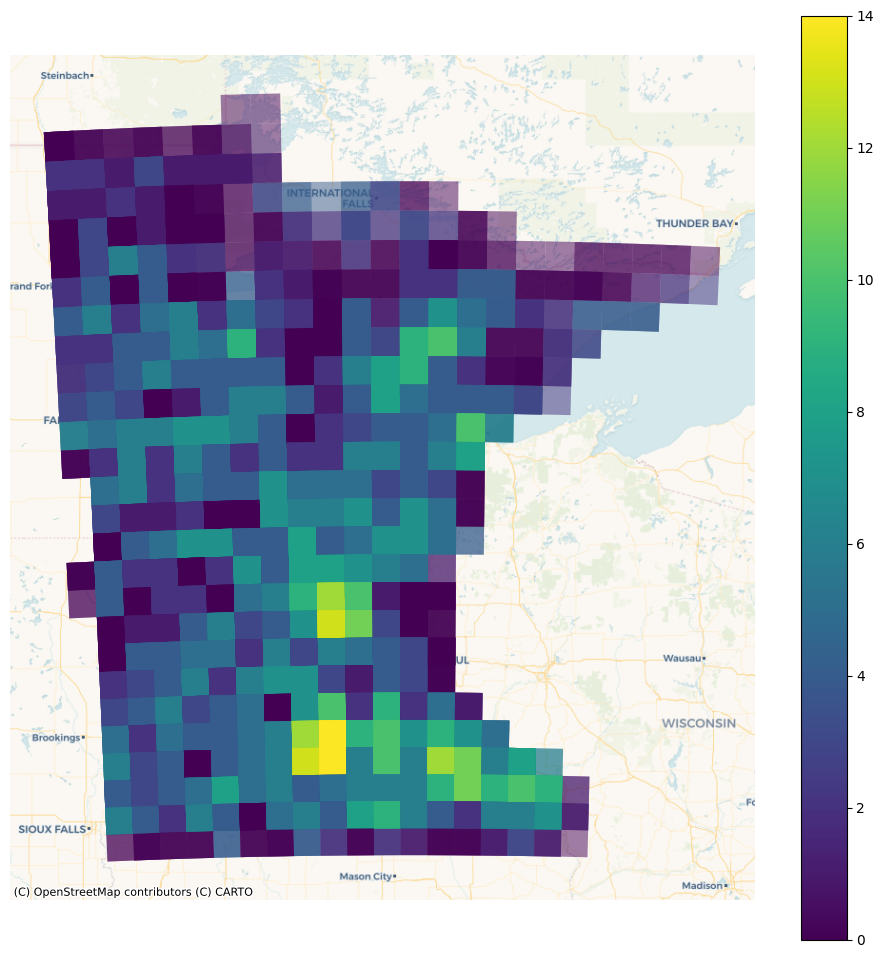

In [20]:
# Calculating agreement for 25000 grid
grid_25000["Agreement"] = grid_25000["LISA_DENSITY"] + grid_25000["LISA_INTENSITY"] + grid_25000["LISA_RATE_FUZZY"] +\
    grid_25000["LISA_DENSITY_FUZZY"] + grid_25000["LISA_INTENSITY_FUZZY"] + grid_25000["LISA_RATE_KNN"] + grid_25000["LISA_DENSITY_KNN"] +\
    grid_25000["LISA_INTENSITY_KNN"] + grid_25000["ADBSCAN_MEAN_ALL"] + grid_25000["ADBSCAN_MEAN_HH"] + grid_25000["ADBSCAN_MEAN_HHHL"] +\
    grid_25000["ADBSCAN_MED_ALL"] + grid_25000["ADBSCAN_MED_HH"] + grid_25000["ADBSCAN_MED_HHHL"]

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

grid_25000.to_crs(epsg=3857).plot(
    ax=ax,
    alpha=0.5,
    column="Agreement",
    legend=True
)

ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager)

ax.axis("off")
plt.show()

## Aggregation

With various different metrics calculated for the grids, these values can now be aggregated to show a better picture of how the methods compare to the others in terms of agreement and similarity.

In [21]:
def aggregate(values, columns):
    # Storing metrics
    metrics = {}
    
    for col in columns:
        # Storing values for each col
        col_values = []
        
        for row in values:
            if col in row:
                col_values.append(row[2])
        
        metrics[col] = {"mean": np.mean(col_values), "stdev": np.std(col_values), "median": np.median(col_values)}
        
    return metrics

def aggregate_accuracy(values, columns):
    # Storing metrics
    metrics = {}
    
    for col in columns:
        # Storing values for each col
        col_values = []
        
        for row in values:
            if col == row[0]:
                col_values.append(row[2])
        
        metrics[col] = {"mean": np.mean(col_values), "stdev": np.std(col_values), "median": np.median(col_values)}
        
    return metrics

def aggregate_r2(df):
    # Storing metrics
    metrics = {}
    
    for col1 in list(df.columns):
        # Storing values for each col
        col_values = []
        
        for col2 in list(df.columns):
            if col1 == col2:
                continue
            else:
                col_values.append(df[col1][col2])
        
        metrics[col1] = {"mean": np.mean(col_values), "stdev": np.std(col_values), "median": np.median(col_values)}
        
    return metrics

In [22]:
# Metrics for 5000m Grid

# Jaccard
jaccard_5000_metrics = aggregate(jaccard_5000, COLUMNS)

# IRR
irr_5000_metrics = aggregate(cohen_5000, COLUMNS)

# Accuracy
acc_5000_metrics = aggregate_accuracy(accuracy_5000, COLUMNS)

# R2
r2_5000_metrics = aggregate_r2(corr_5000)

In [23]:
# Metrics for 10000m Grid

# Jaccard
jaccard_10000_metrics = aggregate(jaccard_10000, COLUMNS)

# IRR
irr_10000_metrics = aggregate(cohen_10000, COLUMNS)

# Accuracy
acc_10000_metrics = aggregate_accuracy(accuracy_10000, COLUMNS)

# R2
r2_10000_metrics = aggregate_r2(corr_10000)

In [24]:
# Metrics for 25000m Grid

# Jaccard
jaccard_25000_metrics = aggregate(jaccard_25000, COLUMNS)

# IRR
irr_25000_metrics = aggregate(cohen_25000, COLUMNS)

# Accuracy
acc_25000_metrics = aggregate_accuracy(accuracy_25000, COLUMNS)

# R2
r2_25000_metrics = aggregate_r2(corr_25000)

In [25]:
# Metrics for All Grids

# Jaccard
jaccard_all = aggregate(jaccard_5000 + jaccard_10000 + jaccard_25000, COLUMNS)

# IRR
irr_all = aggregate(cohen_5000 + cohen_10000 + cohen_25000, COLUMNS)

# Accuracy
acc_all = aggregate_accuracy(accuracy_5000 + accuracy_10000 + accuracy_25000, COLUMNS)

### Table Creation

Now the values can be aggregated together to produce a concise summary of the various metrics and their statistics for each grid cell and altogether.

#### By Grid

In [26]:
# Function to add data to final DF
def format_df(data, grid_name, metric_name):
    # Convert to DF & transpose
    stats_df = pd.DataFrame(data).T
    
    # Create index
    multi_index = pd.MultiIndex.from_product([[grid_name], [metric_name], stats_df.columns], names=["Grid Size", "Metric", "Stat"])
    
    stats_df.columns = multi_index
    
    # Append
    return stats_df

In [27]:
# 5000 meters
j5000 = format_df(jaccard_5000_metrics, "5000 meters", "Jaccard")
i5000 = format_df(irr_5000_metrics, "5000 meters", "IRR")
a5000 = format_df(acc_5000_metrics, "5000 meters", "Accuracy")
r5000 = format_df(r2_5000_metrics, "5000 meters", "R2")

# 10000 meters
j10000 = format_df(jaccard_10000_metrics, "10000 meters", "Jaccard")
i10000 = format_df(irr_10000_metrics, "10000 meters", "IRR")
a10000 = format_df(acc_10000_metrics, "10000 meters", "Accuracy")
r10000 = format_df(r2_10000_metrics, "10000 meters", "R2")

# 25000 meters
j25000 = format_df(jaccard_25000_metrics, "25000 meters", "Jaccard")
i25000 = format_df(irr_25000_metrics, "25000 meters", "IRR")
a25000 = format_df(acc_25000_metrics, "25000 meters", "Accuracy")
r25000 = format_df(r2_25000_metrics, "25000 meters", "R2")

In [28]:
# Concat all separate grid metrics to single table
df_grids = pd.concat([j5000, i5000, a5000, r5000, j10000, i10000, a10000, r10000, j25000, i25000, a25000, r25000])

print(df_grids.groupby(level=0).mean().to_string())

Grid Size            5000 meters                                                                                                             10000 meters                                                                                                             25000 meters                                                                                                            
Metric                   Jaccard                         IRR                      Accuracy                            R2                          Jaccard                         IRR                      Accuracy                            R2                          Jaccard                         IRR                      Accuracy                            R2                    
Stat                        mean     stdev  median      mean     stdev    median      mean     stdev    median      mean     stdev    median         mean     stdev  median      mean     stdev    median      mean     stdev    median   

#### All Grids

In [29]:
# Function to add data to final DF
def format_all_df(data, metric_name):
    # Convert to DF & transpose
    stats_df = pd.DataFrame(data).T
    
    # Create index
    multi_index = pd.MultiIndex.from_product([[metric_name], stats_df.columns], names=["Metric", "Stat"])
    
    stats_df.columns = multi_index
    
    # Append
    return stats_df

# Concat all separate grid metrics to single table
df_all = pd.concat([format_all_df(jaccard_all, "Jaccard"), format_all_df(irr_all, "IRR"), format_all_df(acc_all, "Accuracy")])

print(df_all.groupby(level=0).mean().to_string())

Metric                 Jaccard                         IRR                      Accuracy                    
Stat                      mean     stdev  median      mean     stdev    median      mean     stdev    median
ADBSCAN_MEAN_ALL      0.028623  0.026559  0.0193  0.263023  0.220021  0.264642  0.811413  0.156094  0.854962
ADBSCAN_MEAN_HH       0.009649  0.007579  0.0058  0.273939  0.279431  0.180291  0.829254  0.182609  0.887545
ADBSCAN_MEAN_HHHL     0.003854  0.002936  0.0025  0.171456  0.226321  0.060537  0.821077  0.187162  0.889627
ADBSCAN_MED_ALL       0.027279  0.024475  0.0187  0.264840  0.217596  0.247412  0.813133  0.157410  0.855778
ADBSCAN_MED_HH        0.009705  0.007551  0.0066  0.279393  0.290393  0.173995  0.829352  0.182672  0.886973
ADBSCAN_MED_HHHL      0.006605  0.004584  0.0051  0.246204  0.283550  0.133548  0.824793  0.187458  0.888259
LISA_DENSITY          0.033418  0.034647  0.0205  0.241890  0.135795  0.193740  0.806047  0.123934  0.837533
LISA_DENSITY_FUZZY 